In [4]:
import numpy as np
import csv, os
import matplotlib.pyplot as plt

In [5]:
# train = "./src/results/log_train_16_23-02-2024_10-15-39.csv"
# valid = "./rc/results/log_valid_16_23-02-2024_10-15-39"
train = "./saved_losses/all_data/results/-resnet34-RMS/log_train_16_10-04-2024_18-34-09.csv"
eval = "./saved_losses/all_data/results/-resnet34-RMS/log_valid_16_10-04-2024_18-34-09.csv"
print(os.getcwd())

c:\Users\Lisa\Documents\GitHub\ws-siamese\src


In [6]:
def read_eval_losses(eval_path):
    epochs = []
    losses = []
    with open(eval_path) as eval_f:
        reader = csv.reader(eval_f, delimiter=',')
        idx = 0
        for line in reader:
            print(line)
            idx += 1
            epoch, loss = line[0].split(" ")
            epochs.append(epoch)
            losses.append(loss)

    return np.array(epochs, dtype=np.int16), np.array(losses, dtype=np.float32)

epochs, train_losses = read_eval_losses(train)
epochs, valid_losses = read_eval_losses(eval)
    



['0 0.12488834']
['1 0.07893833']
['2 0.06201845']
['3 0.05024479']
['4 0.04328999']
['5 0.03666582']
['6 0.02142795']
['7 0.01556408']
['8 0.01254286']
['9 0.01044211']
['10 0.00874703']
['11 0.00647098']
['12 0.00574567']
['13 0.00528783']
['14 0.00518557']
['0 0.09324762']
['1 0.08086365']
['2 0.07990783']
['3 0.06912208']
['4 0.0732356']
['5 0.07195725']
['6 0.06114491']
['7 0.06180273']
['8 0.05790564']
['9 0.06263242']
['10 0.0636434']
['11 0.06295433']
['12 0.06292447']
['13 0.06110607']
['14 0.0618126']


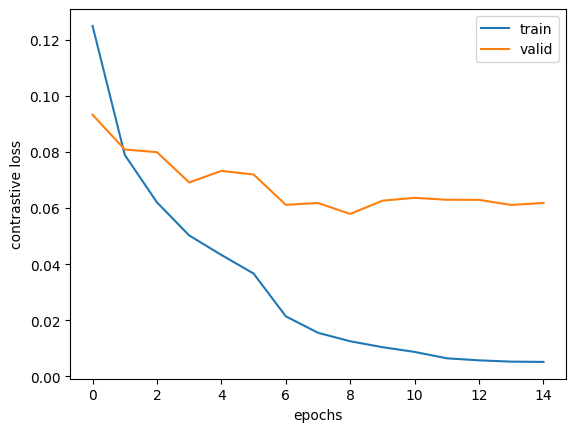

In [7]:
plt.plot(epochs, train_losses, label="train")
plt.plot(epochs, valid_losses, label="valid")
plt.xlabel("epochs")
plt.ylabel("contrastive loss")
plt.legend()
plt.savefig( "./saved_losses/resnet34-losses.png", dpi=300, bbox_inches="tight")
plt.show()

